# Stroke Prediction

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV



import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
df=pd.read_csv('archive (14).zip')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Preprocessing

In [4]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.shape

(5110, 12)

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [11]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

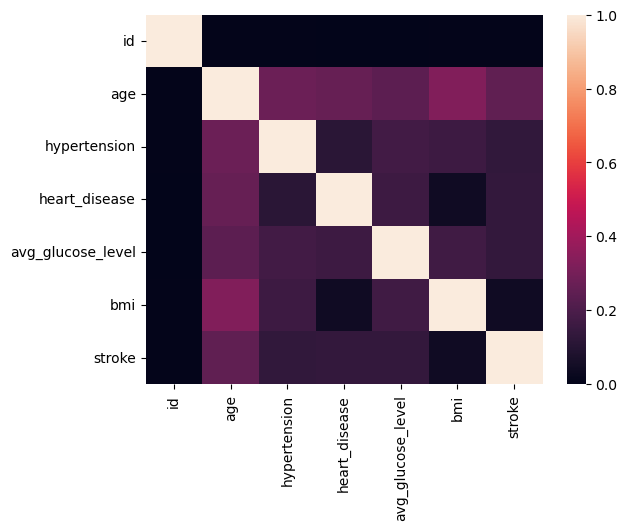

In [12]:
sns.heatmap(df.select_dtypes(['number']).corr())

In [13]:
df.drop(['id','ever_married','work_type','Residence_type'],axis=1,inplace=True)


In [14]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,166.29,25.600000,formerly smoked,0


# EDA

<Axes: xlabel='age', ylabel='Count'>

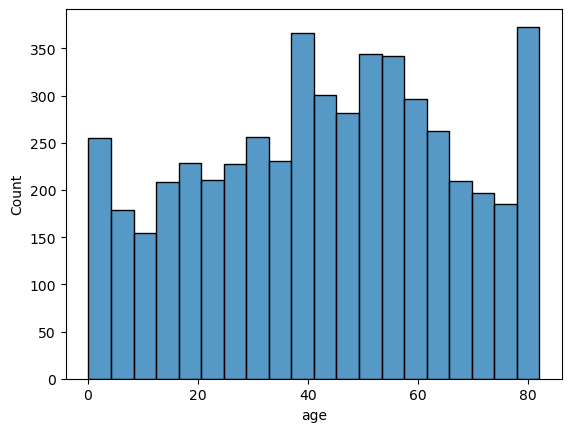

In [15]:
sns.histplot(x='age',data=df)

In [16]:

li=['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']
for i in li:
  print(i,df[i].unique())



gender ['Male' 'Female' 'Other']
age [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]
hypertension 

# COUNT PLOT

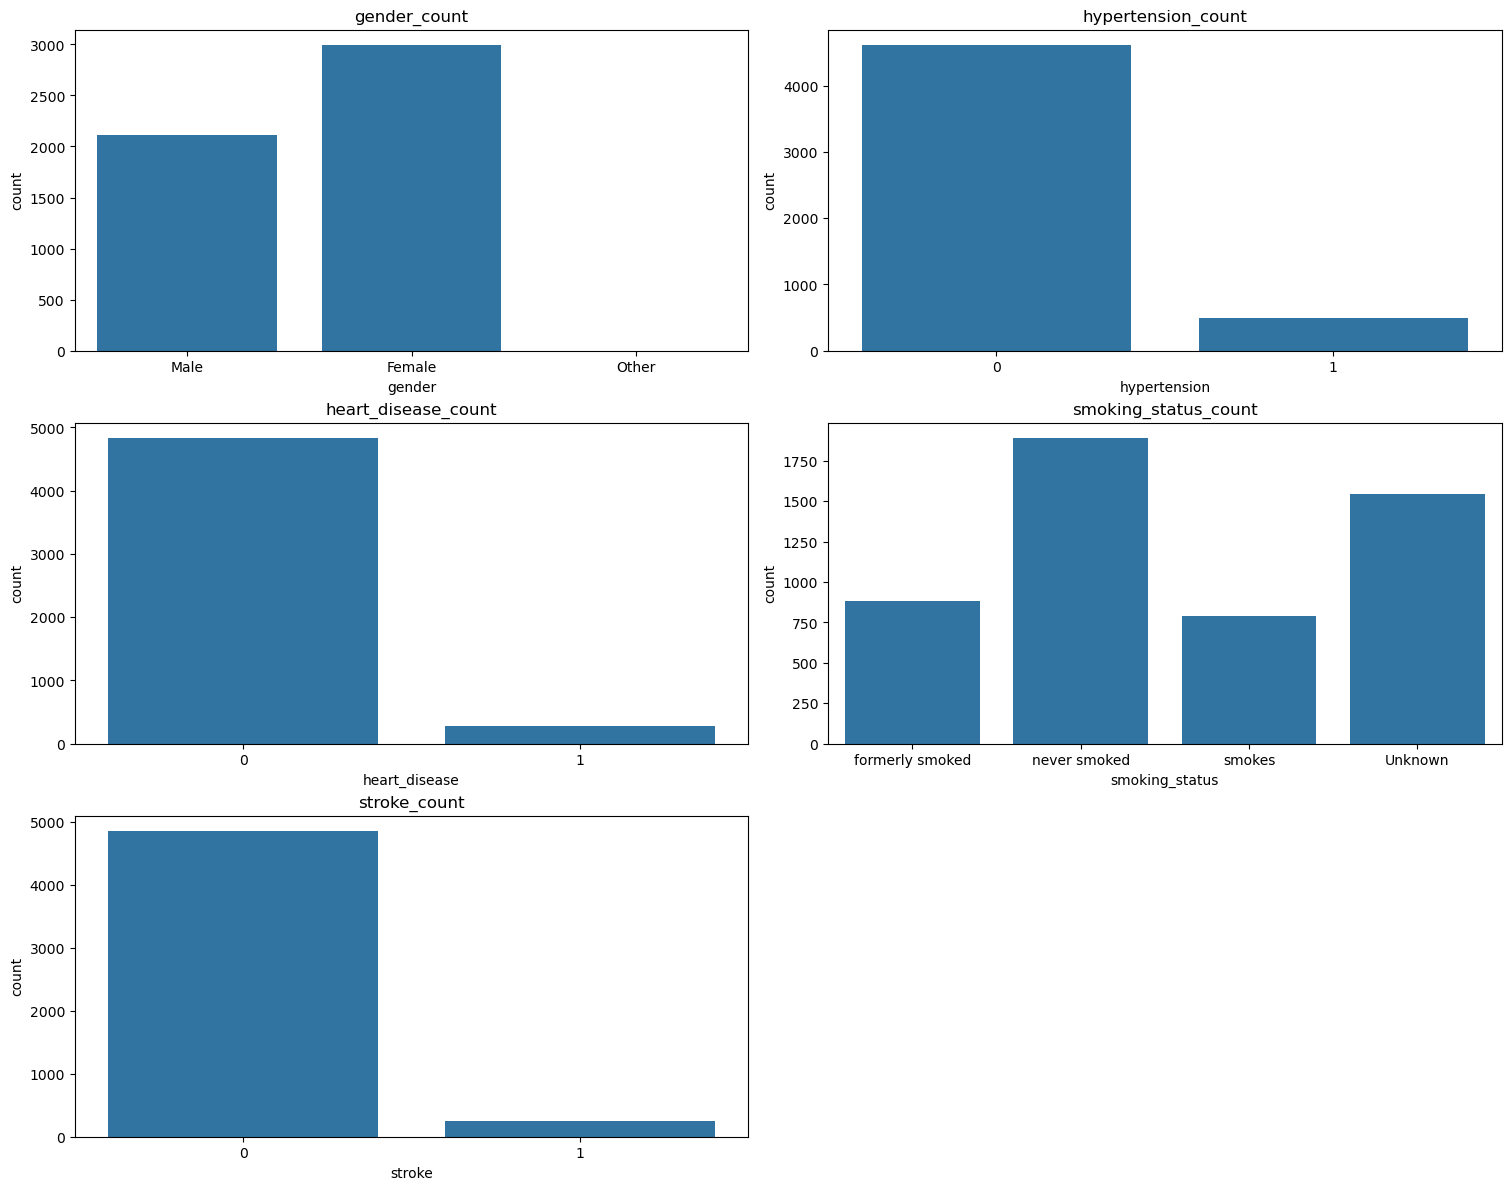

In [17]:
c=['gender', 'hypertension', 'heart_disease','smoking_status', 'stroke']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(c)):
  plt.subplot(4,2,i+1)
  sns.countplot(data=df,x=c[i])
  plt.title(c[i]+'_count')
plt.show()

# PIE PLOT

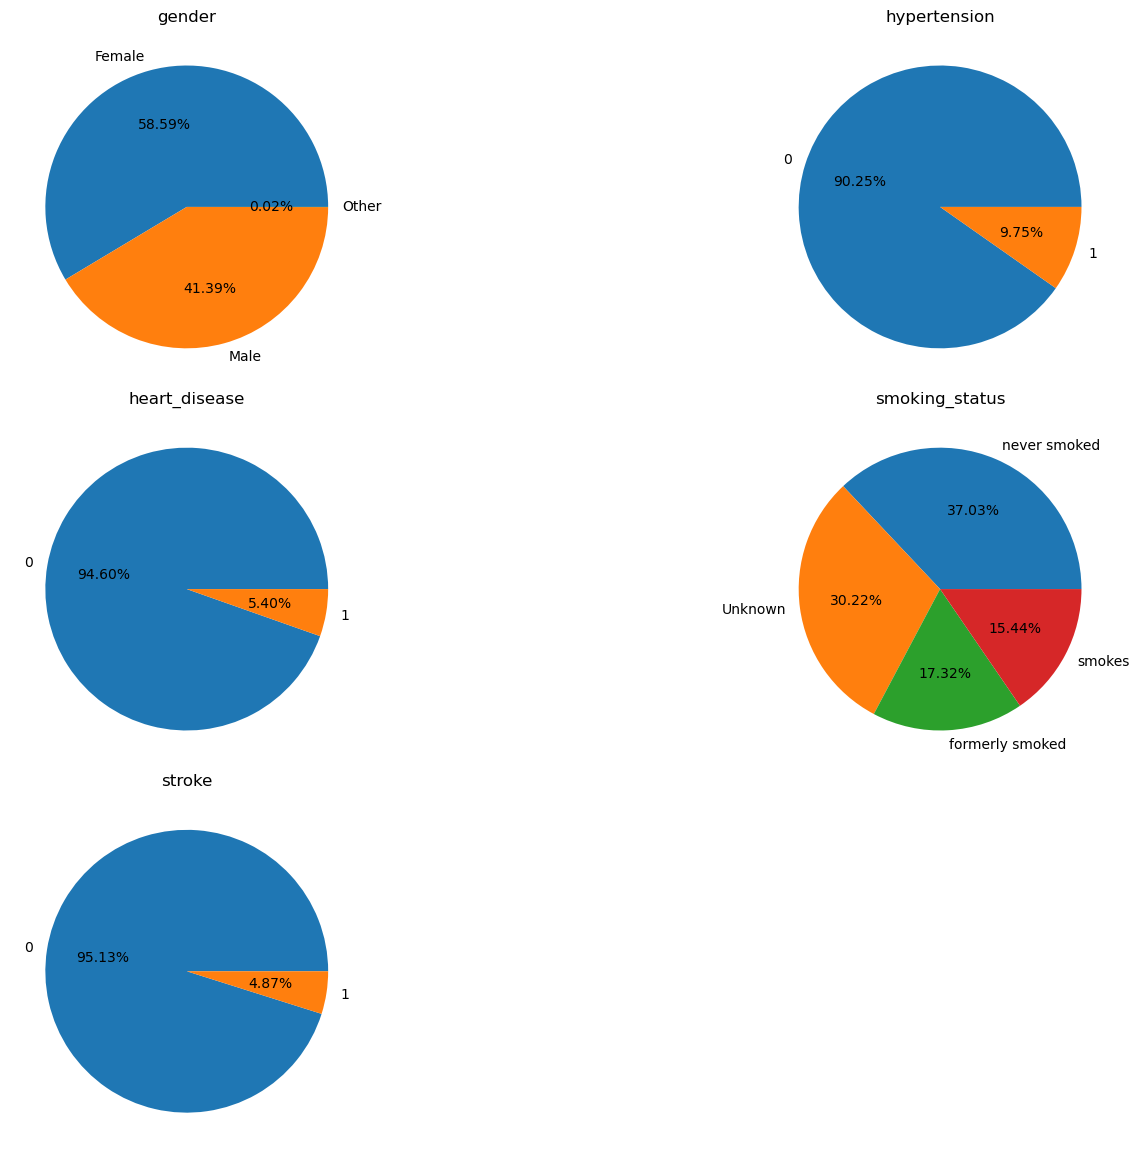

In [18]:
c=['gender', 'hypertension', 'heart_disease','smoking_status', 'stroke']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(c)):
      plt.subplot(4,2,i+1)
      a=df[c[i]].value_counts()
      plt.pie(x=a,labels=a.index,autopct='%1.2f%%')
      plt.title(c[i])

# BOX PLOT

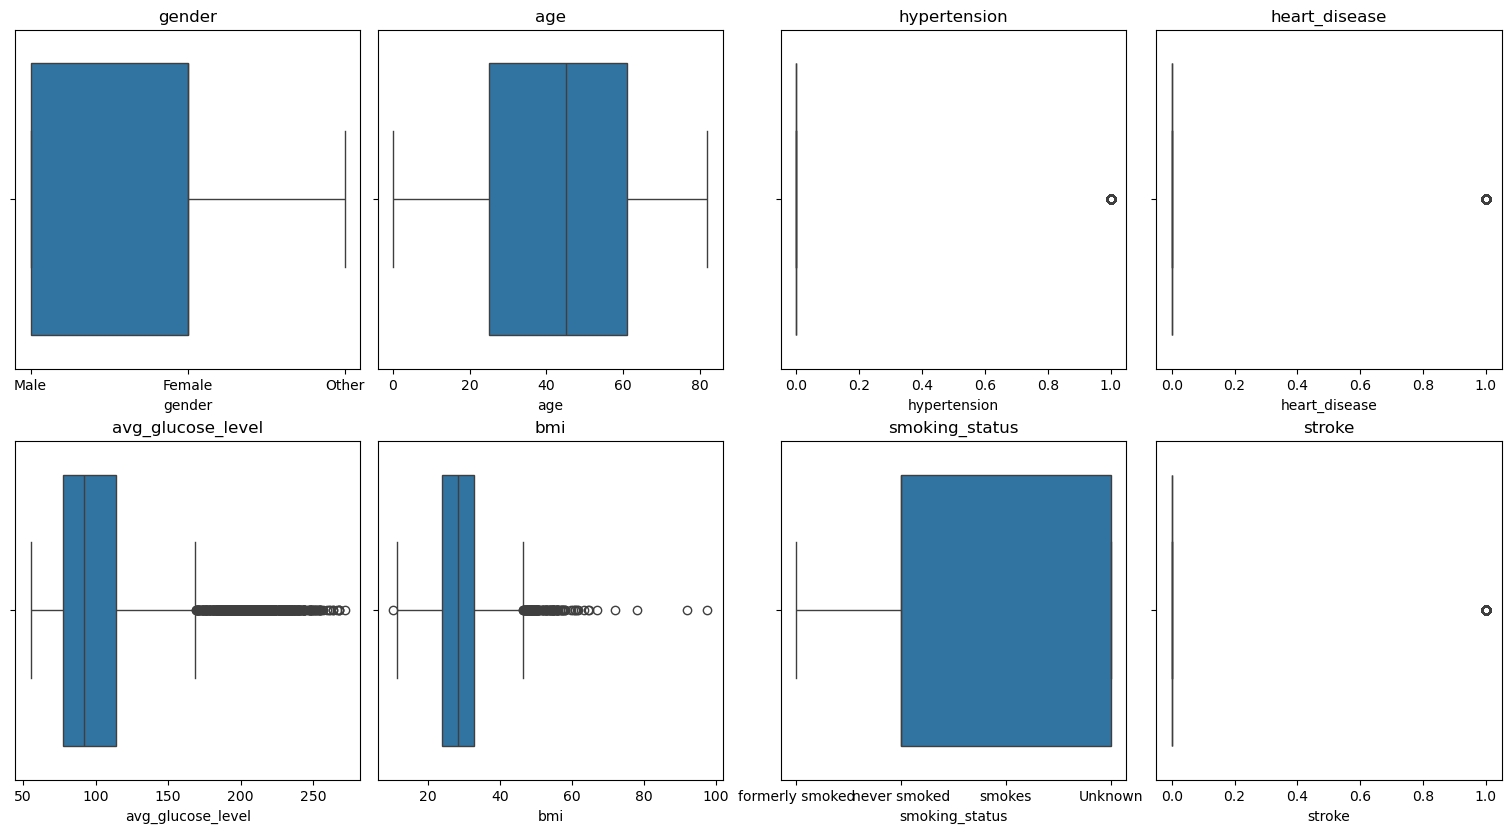

In [19]:
col=['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(col)):
      plt.subplot(4,4,i+1)
      sns.boxplot(data=df,x=col[i])
      plt.title(col[i])




# OUTLIER TREATING

<Axes: >

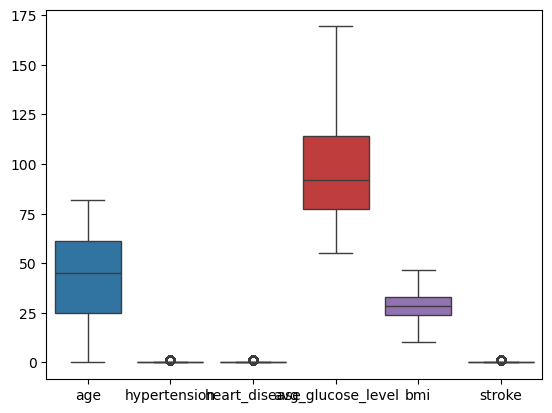

In [20]:
lst=['avg_glucose_level', 'bmi']
for i in lst:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df.loc[(df[i]>=upper_limit),i]=upper_limit
  df.loc[(df[i]<=lower_limit),i]=lower_limit
sns.boxplot(df)

<Axes: ylabel='avg_glucose_level'>

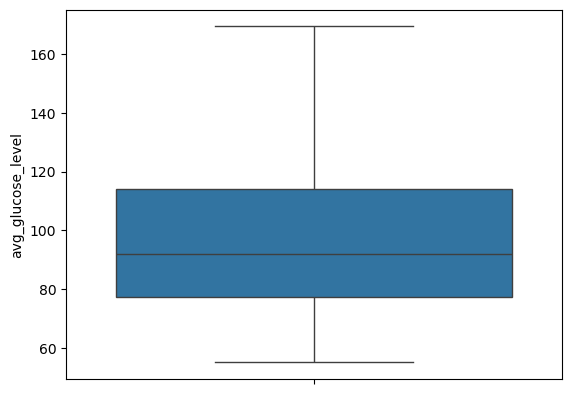

In [21]:
sns.boxplot(df['avg_glucose_level'])

<Axes: ylabel='bmi'>

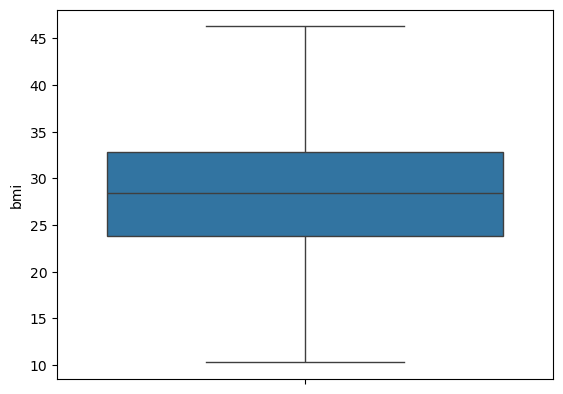

In [22]:
sns.boxplot(df['bmi'])

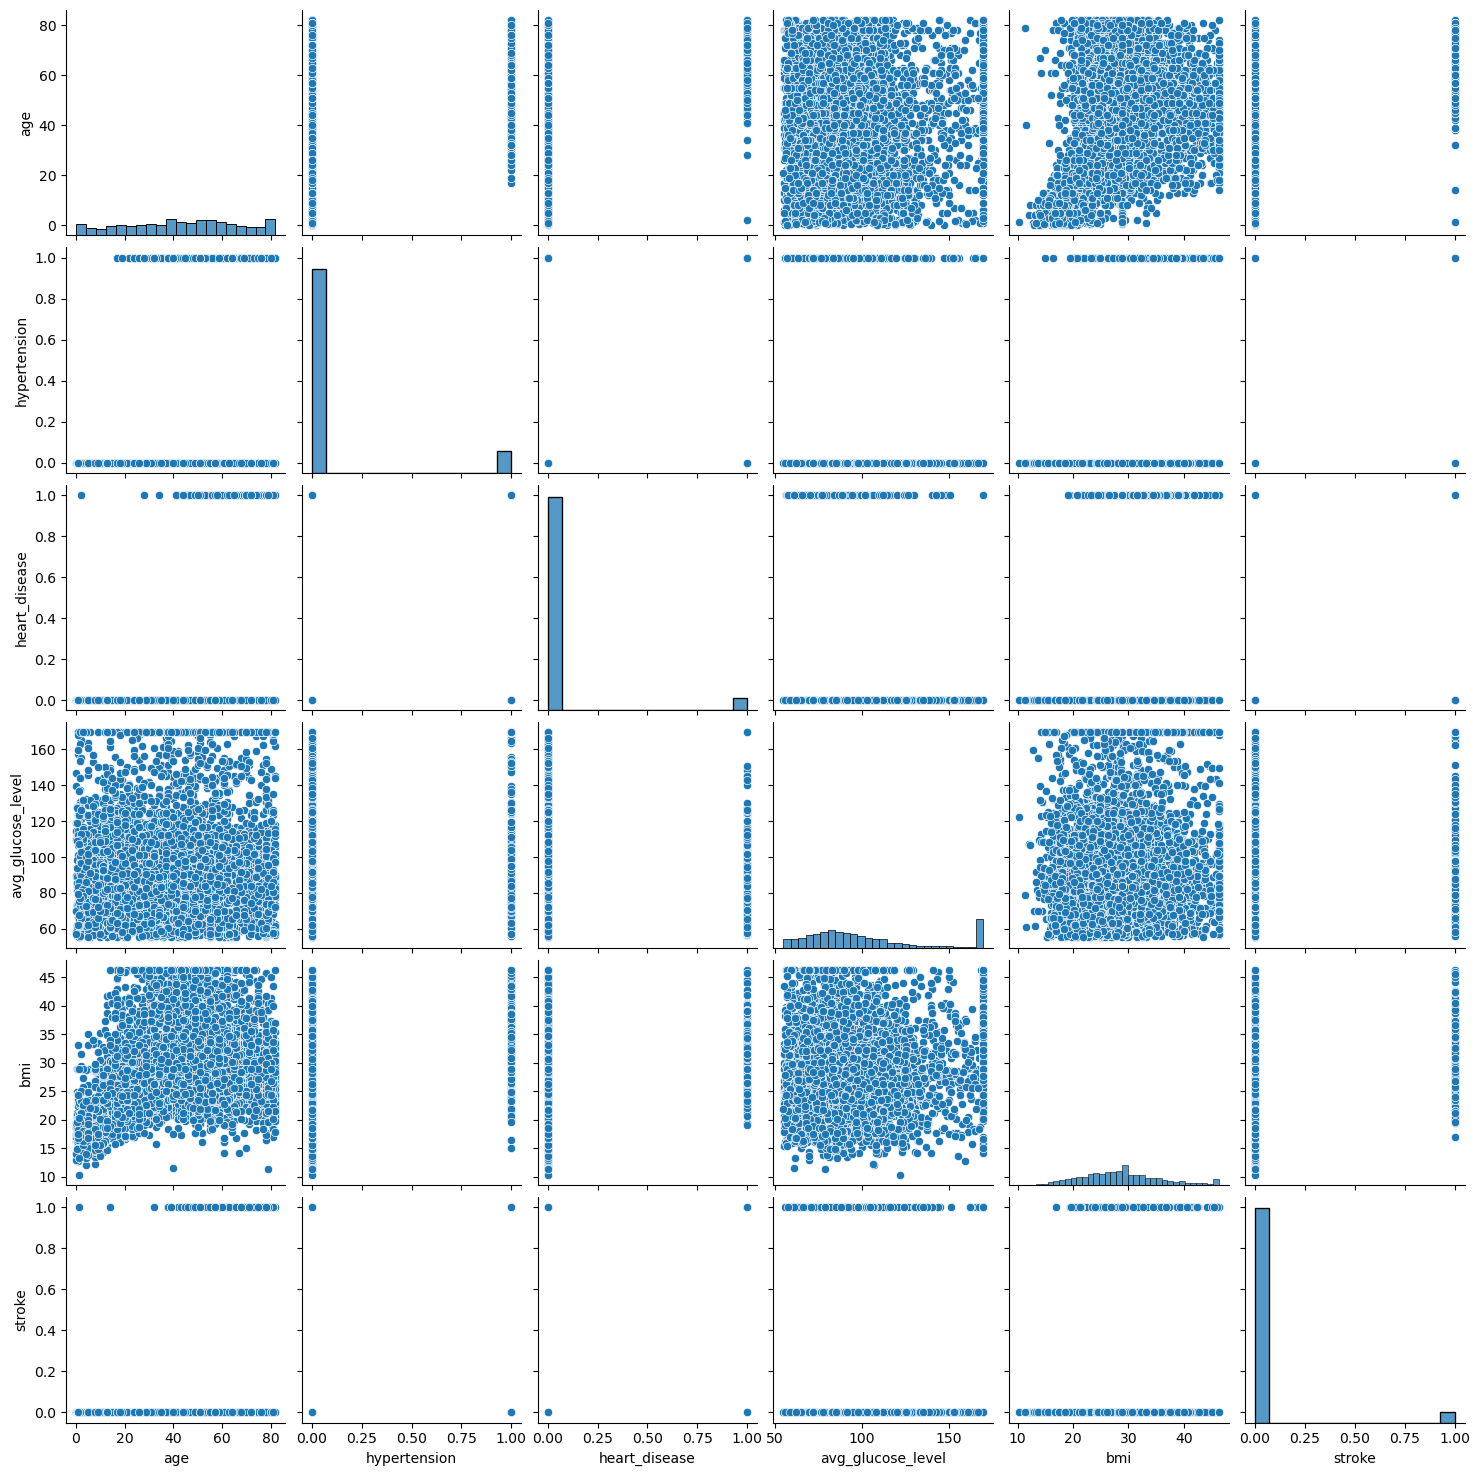

In [23]:
sns.pairplot(df)

# LABEL ENCODING

In [24]:
lb1=LabelEncoder()
lb2=LabelEncoder()
df['gender']=lb1.fit_transform(df['gender'])
df['smoking_status']=lb2.fit_transform(df['smoking_status'])



# SPLITTING DATASET

In [25]:
x=df.iloc[:,:-1]
x

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,169.3575,36.600000,1
1,0,61.0,0,0,169.3575,28.893237,2
2,1,80.0,0,1,105.9200,32.500000,2
3,0,49.0,0,0,169.3575,34.400000,3
4,0,79.0,1,0,169.3575,24.000000,2
...,...,...,...,...,...,...,...
5105,0,80.0,1,0,83.7500,28.893237,2
5106,0,81.0,0,0,125.2000,40.000000,2
5107,0,35.0,0,0,82.9900,30.600000,2
5108,1,51.0,0,0,166.2900,25.600000,1


In [26]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# INTIAL MODEL

 # KNN

Test accuracy: 0.9217221135029354
train accuracy: 0.9569471624266145
CR:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       962
           1       0.05      0.02      0.02        60

    accuracy                           0.92      1022
   macro avg       0.49      0.50      0.49      1022
weighted avg       0.89      0.92      0.90      1022



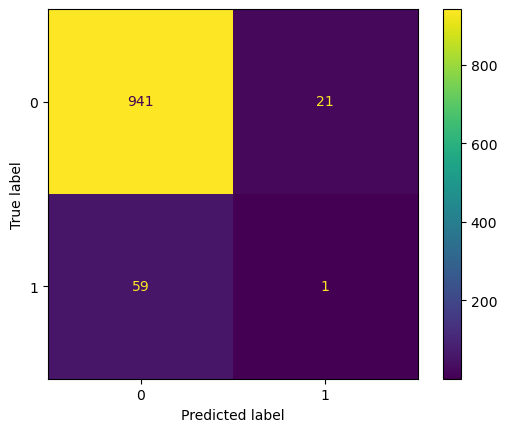

In [28]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred)) 
print('CR:',classification_report(y_test,y_pred))
aknn=accuracy_score(y_test,y_pred)

# LogisticRegression

Test accuracy: 0.9412915851272016
train accuracy: 0.9537671232876712
CR:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       962
           1       0.05      0.02      0.02        60

    accuracy                           0.92      1022
   macro avg       0.49      0.50      0.49      1022
weighted avg       0.89      0.92      0.90      1022



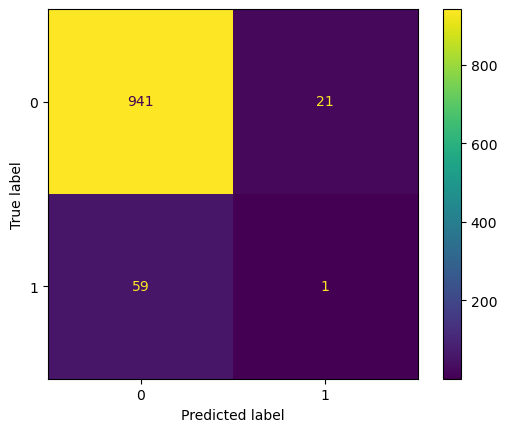

In [29]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
alr=accuracy_score(y_test,y_pred)

# NAIVE_BAYES (GaussianNB)

Test accuracy: 0.8747553816046967
train accuracy: 0.8818493150684932
CR:               precision    recall  f1-score   support

           0       0.96      0.91      0.93       962
           1       0.20      0.38      0.26        60

    accuracy                           0.87      1022
   macro avg       0.58      0.64      0.60      1022
weighted avg       0.91      0.87      0.89      1022



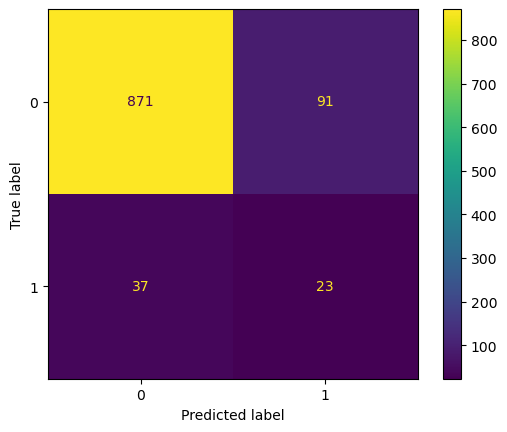

In [30]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_preds=gnb.predict(x_test)
print('Test accuracy:',gnb.score(x_test,y_test))
print('train accuracy:',gnb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
agnb=accuracy_score(y_test,y_preds)

# RANDOMFORESTCLASSIFIER

Test accuracy: 0.9285714285714286
train accuracy: 0.9882583170254403
CR:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       962
           1       0.12      0.03      0.05        60

    accuracy                           0.93      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.89      0.93      0.91      1022



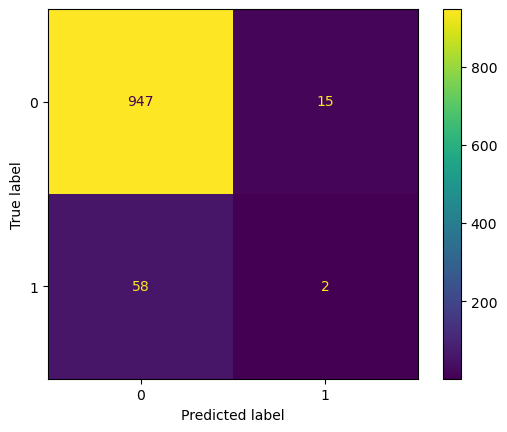

In [31]:
rfc=RandomForestClassifier(n_estimators=5,random_state=10)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('Test accuracy:',rfc.score(x_test,y_test))
print('train accuracy:',rfc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
arfc=accuracy_score(y_test,y_pred)


# ENSEMBLE MODEL

# ADABOOSTING CLASSIFIER

Test accuracy: 0.9412915851272016
train accuracy: 0.9537671232876712
CR:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022



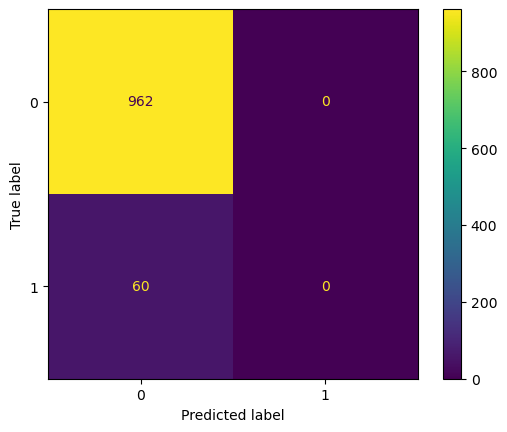

In [32]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
aadaboost=accuracy_score(y_test,y_pred)*100


# GRAIDENTBOOSTINGCLASSIFIER

Test accuracy: 0.9412915851272016
train accuracy: 0.9564579256360078
CR:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022



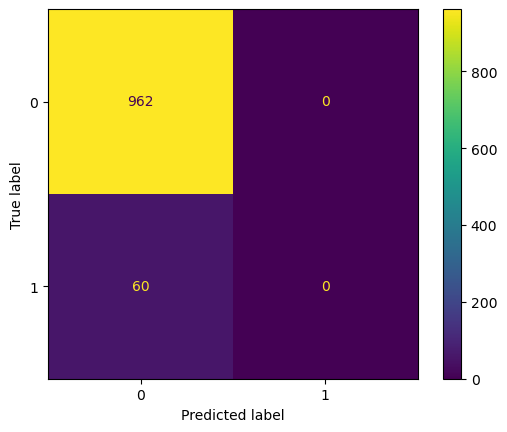

In [33]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
agbc=accuracy_score(y_test,y_preds)*100

# DECISIONTREECLASSIFIER

Test accuracy: 0.9099804305283757
train accuracy: 0.9997553816046967
CR:               precision    recall  f1-score   support

           0       0.95      0.96      0.95       962
           1       0.15      0.12      0.13        60

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022



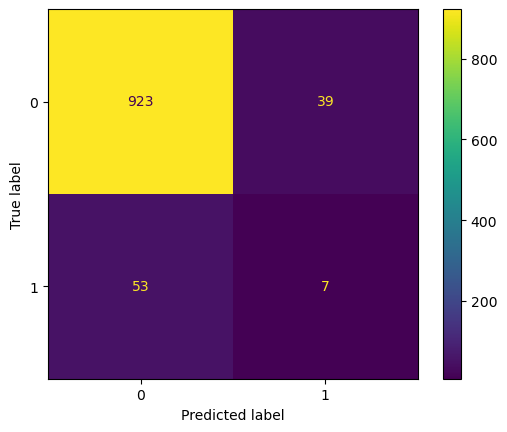

In [34]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
y_predd=dtc.predict(x_test)
print('Test accuracy:',dtc.score(x_test,y_test))
print('train accuracy:',dtc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predd))
print('CR:',classification_report(y_test,y_predd))
adtc=accuracy_score(y_test,y_predd)*100

# INTIAL MODEL ACCURACY

In [35]:
tl=pd.DataFrame()
tl['model']=pd.Series(['knn','lr','gnb','rfc','adaboost','gbc','dtc'])
tl['accuracy']=pd.Series([aknn,alr,agnb,arfc,aadaboost,agbc,adtc])
tl

,model,accuracy
0,knn,0.921722
1,lr,0.921722
2,gnb,0.874755
3,rfc,0.928571
4,adaboost,94.129159
5,gbc,94.129159
6,dtc,90.998043


In [36]:
df.value_counts('stroke')

stroke
0    4861
1     249
Name: count, dtype: int64

# OVERSAMPLING

In [37]:
os=SMOTE(random_state=5)
x_ovs,y_ovs=os.fit_resample(x,y)
y_ovs.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ovs,y_ovs,test_size=0.2,random_state=5)

Test accuracy: 0.926478149100257
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.97      0.88      0.92       958
           1       0.89      0.97      0.93       987

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



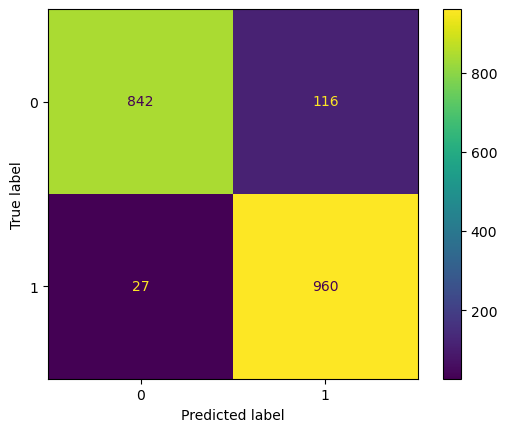

In [39]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
aknnos=accuracy_score(y_test,y_pred)

Test accuracy: 0.7964010282776349
train accuracy: 0.7766490934807766
CR:               precision    recall  f1-score   support

           0       0.97      0.88      0.92       958
           1       0.89      0.97      0.93       987

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



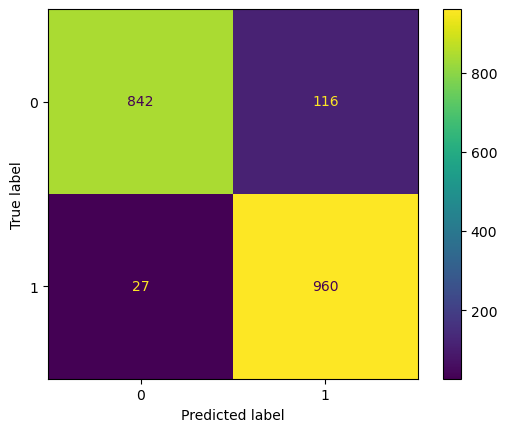

In [40]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
alros=accuracy_score(y_test,y_pred)

Test accuracy: 0.7933161953727507
train accuracy: 0.77999228494278
CR:               precision    recall  f1-score   support

           0       0.83      0.73      0.78       958
           1       0.77      0.85      0.81       987

    accuracy                           0.79      1945
   macro avg       0.80      0.79      0.79      1945
weighted avg       0.80      0.79      0.79      1945



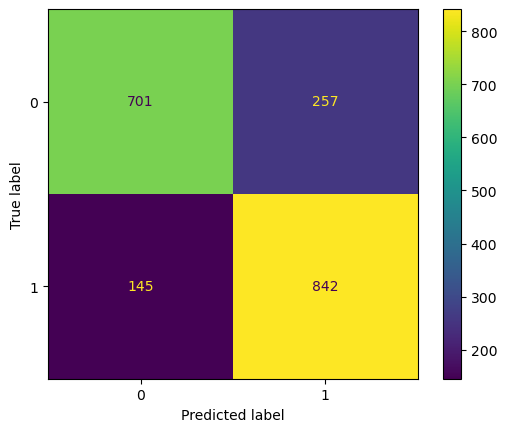

In [41]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_preds=gnb.predict(x_test)
print('Test accuracy:',gnb.score(x_test,y_test))
print('train accuracy:',gnb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
agnbos=accuracy_score(y_test,y_preds)

Test accuracy: 0.9203084832904884
train accuracy: 0.9882988298829883
CR:               precision    recall  f1-score   support

           0       0.94      0.89      0.92       958
           1       0.90      0.95      0.92       987

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



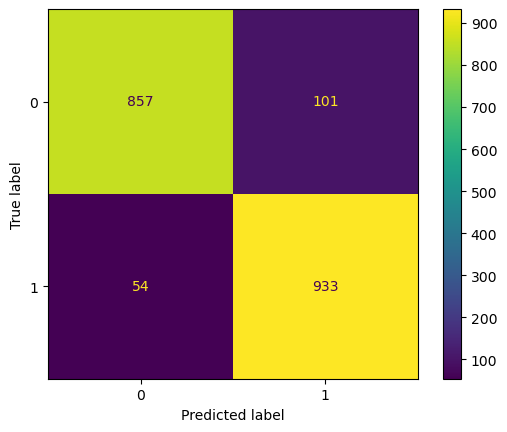

In [42]:
rfc=RandomForestClassifier(n_estimators=5,random_state=10)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('Test accuracy:',rfc.score(x_test,y_test))
print('train accuracy:',rfc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
arfcos=accuracy_score(y_test,y_pred)

Test accuracy: 0.7969151670951157
train accuracy: 0.7736916548797736
CR:               precision    recall  f1-score   support

           0       0.86      0.70      0.77       958
           1       0.75      0.89      0.82       987

    accuracy                           0.80      1945
   macro avg       0.81      0.80      0.79      1945
weighted avg       0.81      0.80      0.79      1945



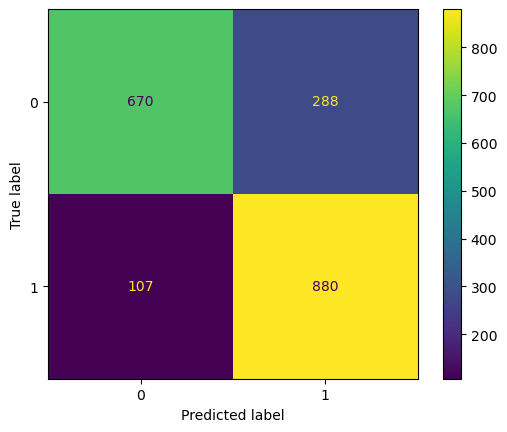

In [43]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=1)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
aadaboostos=accuracy_score(y_test,y_pred)*100

Test accuracy: 0.8488431876606684
train accuracy: 0.8428700012858429
CR:               precision    recall  f1-score   support

           0       0.89      0.79      0.84       958
           1       0.81      0.91      0.86       987

    accuracy                           0.85      1945
   macro avg       0.85      0.85      0.85      1945
weighted avg       0.85      0.85      0.85      1945



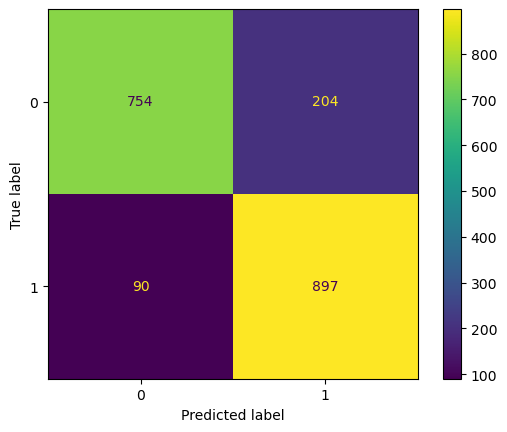

In [44]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
agbcos=accuracy_score(y_test,y_preds)*100

Test accuracy: 0.9125964010282777
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.92      0.91      0.91       958
           1       0.91      0.92      0.91       987

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



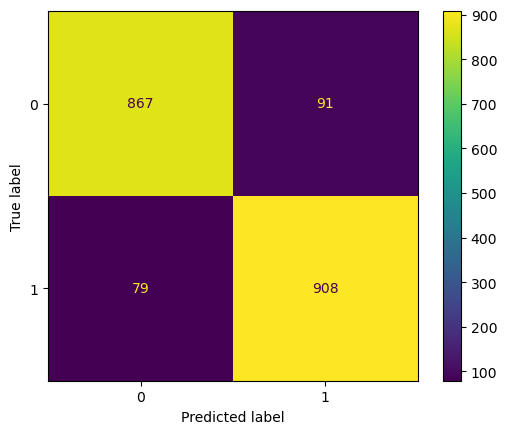

In [45]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
y_predd=dtc.predict(x_test)
print('Test accuracy:',dtc.score(x_test,y_test))
print('train accuracy:',dtc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predd))
print('CR:',classification_report(y_test,y_predd))
adtcos=accuracy_score(y_test,y_predd)*100

# AFTER OVERSAMPLING

In [46]:
tl['Accuracy_oversampling']=pd.Series([aknn,alr,agnb,arfc,aadaboost,agbc,adtc])
tl


,model,accuracy,Accuracy_oversampling
0,knn,0.921722,0.921722
1,lr,0.921722,0.921722
2,gnb,0.874755,0.874755
3,rfc,0.928571,0.928571
4,adaboost,94.129159,94.129159
5,gbc,94.129159,94.129159
6,dtc,90.998043,90.998043


# HYPER PARAMETER TUNING

In [47]:
parameter={'n_neighbors':[0,1,3,5,7,9],'weights':['uniform','distance']}
kc=GridSearchCV(knn,parameter,cv=10,scoring='accuracy')
kc.fit(x_train,y_train)
print(kc.best_params_)

{'n_neighbors': 1, 'weights': 'uniform'}


Test accuracy: 0.926478149100257
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.97      0.88      0.92       958
           1       0.89      0.97      0.93       987

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



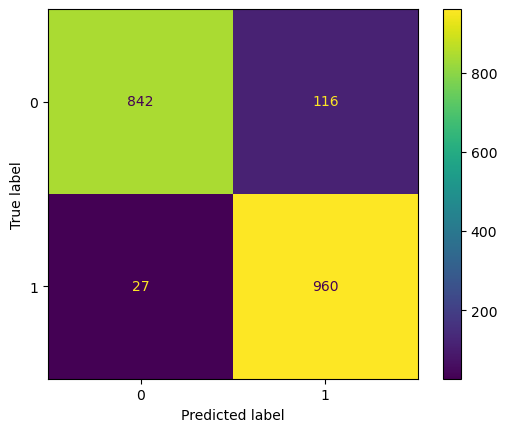

In [48]:
knn=KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
ka=accuracy_score(y_test,y_pred)
y_trainpredknn=knn.predict(x_train)
nnk=accuracy_score(y_trainpredknn,y_train)

In [49]:
parameter={'C':[0.1,1,10,100],'max_iter':[100,200,300]}
l=GridSearchCV(lr,parameter,cv=5,scoring='accuracy')
l.fit(x_train,y_train)
print(l.best_params_)

{'C': 0.1, 'max_iter': 100}


Test accuracy: 0.7953727506426735
train accuracy: 0.7766490934807766
CR:               precision    recall  f1-score   support

           0       0.97      0.88      0.92       958
           1       0.89      0.97      0.93       987

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



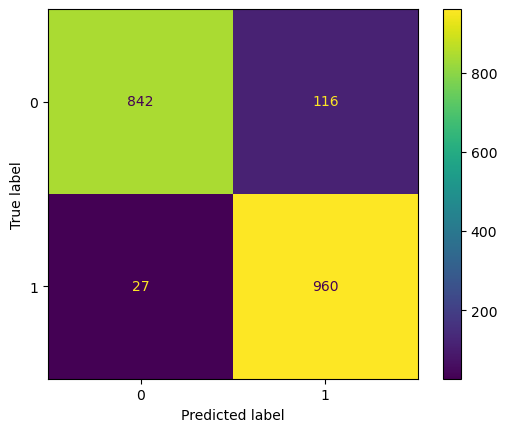

In [50]:
lr=LogisticRegression(C=100,max_iter=200)
lr.fit(x_train,y_train)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
la=accuracy_score(y_test,y_pred)
y_trainpredlr=lr.predict(x_train)
rl=accuracy_score(y_trainpredlr,y_train)

In [51]:
parameter={'var_smoothing':[1e-10,1e-8,1e-9]}
gu=GridSearchCV(gnb,parameter,cv=5,scoring='accuracy')
gu.fit(x_train,y_train)
print(gu.best_params_)

{'var_smoothing': 1e-10}


Test accuracy: 0.7933161953727507
train accuracy: 0.77999228494278
CR:               precision    recall  f1-score   support

           0       0.83      0.73      0.78       958
           1       0.77      0.85      0.81       987

    accuracy                           0.79      1945
   macro avg       0.80      0.79      0.79      1945
weighted avg       0.80      0.79      0.79      1945



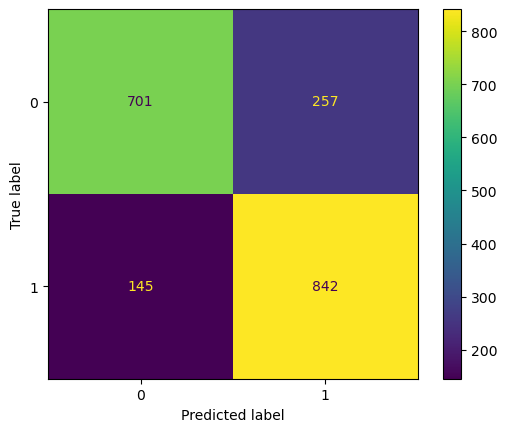

In [52]:
gnb=GaussianNB(var_smoothing=1e-10)
gnb.fit(x_train,y_train)
y_preds=gnb.predict(x_test)
print('Test accuracy:',gnb.score(x_test,y_test))
print('train accuracy:',gnb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
gu=accuracy_score(y_test,y_preds)
y_trainpredgnb=gnb.predict(x_train)
bng=accuracy_score(y_trainpredgnb,y_train)

In [53]:
Parameter={'n_estimators':['50','200','100'],'max_features':['sqrt','log2'],'random_state':[2,5,10]}
r=GridSearchCV(rfc,parameter,cv=10,scoring='accuracy')
r.fit(x_train,y_train)
r.best_params_

Test accuracy: 0.9419023136246787
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.96      0.92      0.94       958
           1       0.93      0.96      0.94       987

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



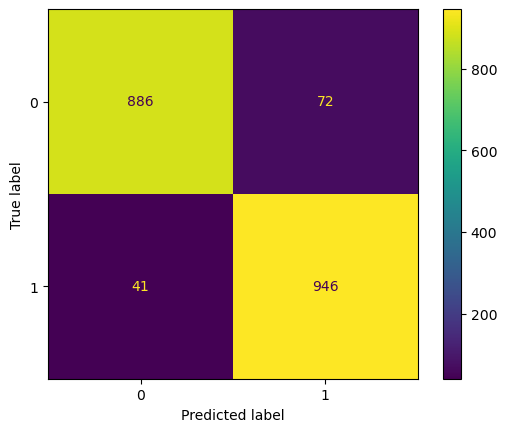

In [54]:
rfc=RandomForestClassifier(n_estimators=100,random_state=2)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('Test accuracy:',rfc.score(x_test,y_test))
print('train accuracy:',rfc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
ra=accuracy_score(y_test,y_pred)
y_trainpredrfc=rfc.predict(x_train)
cfr=accuracy_score(y_trainpredrfc,y_train)

In [55]:
parameter={'n_estimators':[50,100,150,200,250,500],'learning_rate':[0.5,0.1,0.2],'random_state':[1,2,3,10]}
a=GridSearchCV(adaboost,parameter,cv=5,scoring='accuracy')
a.fit(x_train,y_train)
print(a.best_params_)

{'learning_rate': 0.5, 'n_estimators': 500, 'random_state': 1}


Test accuracy: 0.8303341902313625
train accuracy: 0.8294972354378295
CR:               precision    recall  f1-score   support

           0       0.85      0.80      0.82       958
           1       0.81      0.86      0.84       987

    accuracy                           0.83      1945
   macro avg       0.83      0.83      0.83      1945
weighted avg       0.83      0.83      0.83      1945



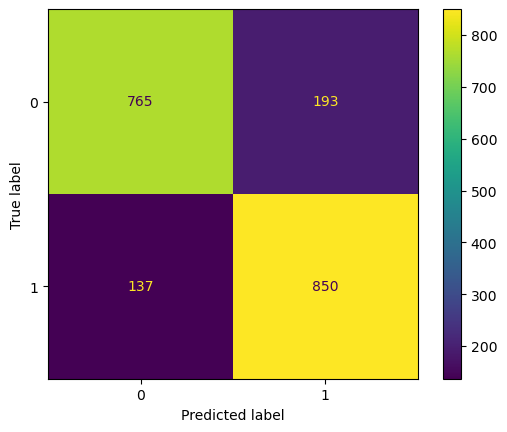

In [56]:
adaboost=AdaBoostClassifier(n_estimators=500,estimator=None,learning_rate=0.5,random_state=1)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
aa=accuracy_score(y_test,y_pred)*100
y_trainpredad=adaboost.predict(x_train)
da=accuracy_score(y_trainpredad,y_train)

In [57]:
parameter={'n_estimators':[30,40,50,60,100],'learning_rate':[0.05,0.1,0.2,0.4,0.5],'max_depth':[1,2,3,5,10,15]}
g=GridSearchCV(gbc,parameter,cv=2,scoring='accuracy')
g.fit(x_train,y_train)
print(g.best_params_)

{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}


Test accuracy: 0.8488431876606684
train accuracy: 0.8428700012858429
CR:               precision    recall  f1-score   support

           0       0.89      0.79      0.84       958
           1       0.81      0.91      0.86       987

    accuracy                           0.85      1945
   macro avg       0.85      0.85      0.85      1945
weighted avg       0.85      0.85      0.85      1945



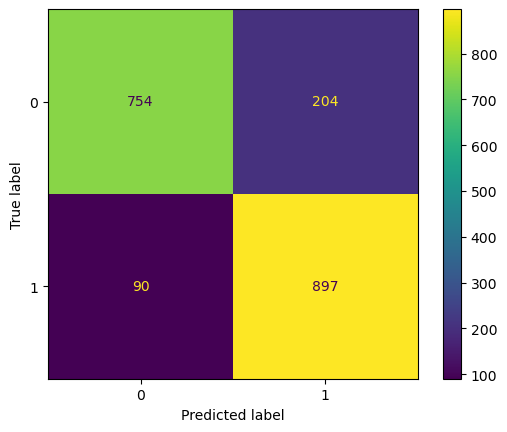

In [58]:
gradient=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,max_depth=10)
gradient.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
ga=accuracy_score(y_test,y_preds)*100
y_trainpredgbc=gbc.predict(x_train)
cbg=accuracy_score(y_trainpredgbc,y_train)

In [59]:
parameter={'max_depth':[10,20,30,50],'criterion':['gini','entropy'],'random_state':[1,2,3,10]}
d=GridSearchCV(dtc,parameter,cv=5,scoring='accuracy')
d.fit(x_train,y_train)
print(d.best_params_)

{'criterion': 'entropy', 'max_depth': 50, 'random_state': 1}


Test accuracy: 0.9125964010282777
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.92      0.91      0.91       958
           1       0.91      0.92      0.91       987

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



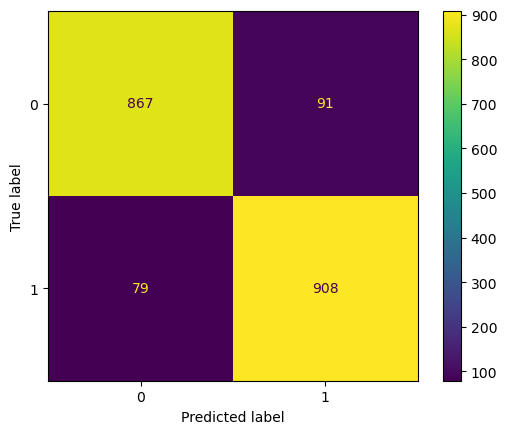

In [60]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=30,random_state=1)
dtc.fit(x_train,y_train)
y_predd=dtc.predict(x_test)
print('Test accuracy:',dtc.score(x_test,y_test))
print('train accuracy:',dtc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predd))
print('CR:',classification_report(y_test,y_predd))
ta=accuracy_score(y_test,y_predd)*100
y_trainpreddtc=dtc.predict(x_train)
ctd=accuracy_score(y_trainpreddtc,y_train)

# HYPERPARAMETER TUNING AFTER ACCURACY

In [61]:
tl=pd.DataFrame()
tl['model']=pd.Series(['knn','lr','gnb','rfc','adaboost','gbc','dtc'])
tl['Test_Accuracy']=pd.Series([nnk,rl,bng,cfr,da,cbg,ctd])
tl['Train_Accuracy']=pd.Series([ka,la,gu,ra,aa,ga,ta])
tl

,model,Test_Accuracy,Train_Accuracy
0,knn,1.000000,0.926478
1,lr,0.776649,0.926478
2,gnb,0.779992,0.793316
3,rfc,1.000000,0.941902
4,adaboost,0.829497,83.033419
5,gbc,0.842870,84.884319
6,dtc,1.000000,91.259640


In [62]:
import joblib
joblib.dump(rfc,'gradient1.pkl')
joblib.dump(lb1,'label1.pkl')
joblib.dump(lb2,'label2.pkl')


['label2.pkl']

In [63]:
import numpy as np
a=[[0,	86.0,	1,	1,	210.00,	28.00,	2]]
rfc.predict(a)


array([1], dtype=int64)